In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
import pathlib

In [ ]:
from collections import OrderedDict as OD
from datetime import datetime

In [ ]:
from calendar import month_abbr

In [20]:
import numpy as np 
import pandas as pd 
import xarray as xr

In [21]:
def interp(dset, interp_factor=4, lon_name='lon', lat_name='lat'): 
    """
    Interpolate (i.e. increase the resolution) of a xarray dataset by `interp_factor`
    Parameters
    ----------
    dset : xarray.Dataset
        the xarray Dataset to interpolate
    interp_factor : int, optional
        the increase in resolution, by default 4
    lon_name : str, optional
        name of the longitude variable, by default 'lon'
    lat_name : str, optional
        name of the latitude variable, by default 'lat'
    
    Return
    ------
    
    dset : the interpolated dataset 
    """
    
    import numpy as np 
    
    target_grid = dset[[lon_name, lat_name]]
    
    target_grid[lon_name] = ((lon_name), np.linspace(target_grid[lon_name].data[0], target_grid[lon_name].data[-1], num=len(target_grid[lon_name])*interp_factor, endpoint=True))
    target_grid[lat_name] = ((lat_name), np.linspace(target_grid[lat_name].data[0], target_grid[lat_name].data[-1], num=len(target_grid[lat_name])*interp_factor, endpoint=True))
    
    dset = dset.interp_like(target_grid)
    
    return dset

### read the ONI from the CPC 

In [22]:
url = "https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt"

In [23]:
oni = pd.read_table('../data/oni.ascii.txt', sep=r'\s+', engine='python')

In [24]:
oni

,SEAS,YR,TOTAL,ANOM
0,DJF,1950,24.72,-1.53
1,JFM,1950,25.17,-1.34
2,FMA,1950,25.75,-1.16
3,MAM,1950,26.12,-1.18
4,AMJ,1950,26.32,-1.07
...,...,...,...,...
859,JAS,2021,26.46,-0.49
860,ASO,2021,26.08,-0.68
861,SON,2021,25.90,-0.81
862,OND,2021,25.69,-0.98


In [25]:
# oni = pd.read_table(url, sep=r'\s+', engine='python')

### select the period post 1979

In [37]:
first_year = 1979

In [38]:
last_year = 2021

In [39]:
oni = oni.loc[oni.YR >= first_year,:]

In [40]:
oni = oni.loc[oni.YR <= last_year,:]

In [41]:
oni.head()

,SEAS,YR,TOTAL,ANOM
348,DJF,1979,26.50,0.03
349,JFM,1979,26.75,0.07
350,FMA,1979,27.22,0.20
351,MAM,1979,27.60,0.28
352,AMJ,1979,27.66,0.23


In [42]:
oni.tail()

,SEAS,YR,TOTAL,ANOM
859,JAS,2021,26.46,-0.49
860,ASO,2021,26.08,-0.68
861,SON,2021,25.90,-0.81
862,OND,2021,25.69,-0.98
863,NDJ,2021,25.63,-0.99


### plots the ONI for record 

In [44]:
index = pd.date_range(start=f'{first_year}-01-01', end=f'{last_year}-12-01', freq='MS')

In [45]:
index

DatetimeIndex(['1979-01-01', '1979-02-01', '1979-03-01', '1979-04-01',
               '1979-05-01', '1979-06-01', '1979-07-01', '1979-08-01',
               '1979-09-01', '1979-10-01',
               ...
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', length=516, freq='MS')

In [46]:
plot_oni = oni.copy()

In [47]:
plot_oni.index = index

<AxesSubplot:>

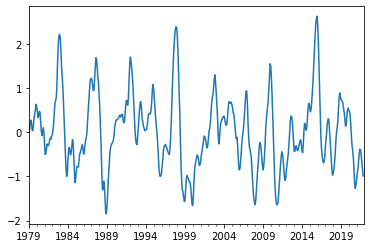

In [48]:
plot_oni.ANOM.plot()

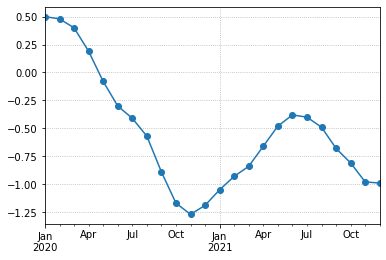

In [49]:
f, ax = plt.subplots()
plot_oni.loc[f'{year-1}':f'{year+1}','ANOM'].plot(marker='o',ax=ax)
ax.grid(ls=':')

### set the season (string corresponding to the season in the ONI index)

In [50]:
dict_season = {}

dict_season['JFM'] = [1, 3]
dict_season['FMA'] = [2, 4]
dict_season['MAM'] = [3, 5]
dict_season['AMJ'] = [4, 6]
dict_season['MJJ'] = [5, 7]
dict_season['JJA'] = [6, 8]
dict_season['JAS'] = [7, 9]
dict_season['ASO'] = [8, 10]
dict_season['SON'] = [9, 11]
dict_season['OND'] = [10, 12]

In [51]:
season = 'JFM'
# season = 'JJA'
# season = 'OND'

### months spanned by the season

In [52]:
months = dict_season[season]

In [53]:
title = f"{month_abbr[months[0]]} - {month_abbr[months[1]]}"

In [54]:
title

'Jan - Mar'

### selects the Oceanic Nino Index seasonal values for the season 

In [55]:
oni_seas = oni.loc[oni.SEAS == season]

In [56]:
oni_seas

,SEAS,YR,TOTAL,ANOM
349,JFM,1979,26.75,0.07
361,JFM,1980,27.13,0.46
373,JFM,1981,26.32,-0.50
385,JFM,1982,26.90,0.07
397,JFM,1983,28.75,1.92
409,JFM,1984,26.41,-0.42
421,JFM,1985,25.98,-0.85
433,JFM,1986,26.28,-0.47
445,JFM,1987,27.95,1.19
457,JFM,1988,27.29,0.54


### threshold used to define the ENSO events (NINO, NINA, NEUTRAL)

In [57]:
ONI_threshold = 0.5

In [58]:
ninos = oni_seas.query('ANOM > {}'.format(ONI_threshold))

In [59]:
ninas = oni_seas.query('ANOM < {}'.format(-ONI_threshold))

In [60]:
neutral = oni_seas.query(f'{-ONI_threshold} <= ANOM <= {ONI_threshold}')

In [61]:
ninos

,SEAS,YR,TOTAL,ANOM
397,JFM,1983,28.75,1.92
445,JFM,1987,27.95,1.19
457,JFM,1988,27.29,0.54
505,JFM,1992,28.52,1.63
541,JFM,1995,27.61,0.72
577,JFM,1998,28.78,1.93
637,JFM,2003,27.41,0.63
661,JFM,2005,27.36,0.58
721,JFM,2010,28.09,1.22
793,JFM,2016,29.01,2.14


In [62]:
len(ninos)

11

In [63]:
ninas

,SEAS,YR,TOTAL,ANOM
421,JFM,1985,25.98,-0.85
469,JFM,1989,25.32,-1.43
553,JFM,1996,26.10,-0.75
589,JFM,1999,25.55,-1.30
601,JFM,2000,25.44,-1.41
613,JFM,2001,26.26,-0.52
673,JFM,2006,26.10,-0.77
697,JFM,2008,25.35,-1.52
709,JFM,2009,26.08,-0.79
733,JFM,2011,25.68,-1.19


In [64]:
len(ninas)

13

In [65]:
neutral

,SEAS,YR,TOTAL,ANOM
349,JFM,1979,26.75,0.07
361,JFM,1980,27.13,0.46
373,JFM,1981,26.32,-0.50
385,JFM,1982,26.90,0.07
409,JFM,1984,26.41,-0.42
433,JFM,1986,26.28,-0.47
481,JFM,1990,26.96,0.21
493,JFM,1991,27.15,0.26
517,JFM,1993,27.18,0.30
529,JFM,1994,26.95,0.07


In [66]:
len(neutral)

19

### Now reads the CMAP monthly values

In [67]:
dset = xr.open_dataset('../data/CMAP/precip.mon.mean.nc') 

In [68]:
dset = dset.sortby('lat')

### restrict the domain to [110.,-30.,280.,20.] for tthe sector plots

In [69]:
dset = dset.sel(lat=slice(-40., 30.), lon=slice(150, 360 - 90))

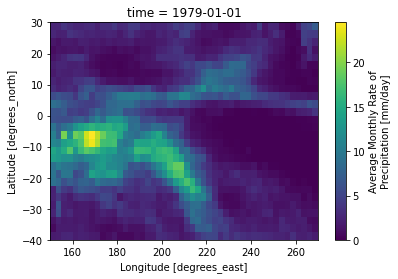

In [70]:
dset['precip'][0,:,:].plot()

### calculate the climatology 

In [71]:
clim = dset.sel(time=slice('1991','2020'))

In [72]:
clim = clim.groupby(clim.time.dt.month).mean('time')

### calculates the seasonal averages from the monthly means 

In [73]:
dset_seas = dset.rolling(time=3, min_periods=3).mean()

In [74]:
dset_seas

<xarray.Dataset>
Dimensions:  (lat: 28, lon: 48, time: 516)
Coordinates:
  * lat      (lat) float32 -38.75 -36.25 -33.75 -31.25 ... 23.75 26.25 28.75
  * lon      (lon) float32 151.2 153.8 156.2 158.8 ... 261.2 263.8 266.2 268.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
Data variables:
    precip   (time, lat, lon) float32 nan nan nan nan ... 1.17 1.98 1.877 1.377
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (excludes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    References:     https://www.psl.noaa.gov/data/gridded/data.cmap.html
    version:        V2201
    history:        update 01/2022 V2201
    data_modified:  2022-01-10

In [75]:
dset_seas = dset_seas.sel(time=(dset_seas.time.dt.month == months[1]))

In [76]:
from datetime import datetime

In [77]:
time_index_ninos = [datetime(y, months[1], 1) for y in ninos.YR.values]
time_index_ninas = [datetime(y, months[1], 1) for y in ninas.YR.values]
time_index_neutral = [datetime(y, months[1], 1) for y in neutral.YR.values]

In [78]:
time_index_ninos

[datetime.datetime(1983, 3, 1, 0, 0),
 datetime.datetime(1987, 3, 1, 0, 0),
 datetime.datetime(1988, 3, 1, 0, 0),
 datetime.datetime(1992, 3, 1, 0, 0),
 datetime.datetime(1995, 3, 1, 0, 0),
 datetime.datetime(1998, 3, 1, 0, 0),
 datetime.datetime(2003, 3, 1, 0, 0),
 datetime.datetime(2005, 3, 1, 0, 0),
 datetime.datetime(2010, 3, 1, 0, 0),
 datetime.datetime(2016, 3, 1, 0, 0),
 datetime.datetime(2019, 3, 1, 0, 0)]

In [79]:
ninos_cmorph = dset_seas.sel(time=time_index_ninos)

In [80]:
ninas_cmorph = dset_seas.sel(time=time_index_ninas)

In [81]:
neutral_cmorph = dset_seas.sel(time=time_index_neutral)

In [82]:
ninas_cmorph

<xarray.Dataset>
Dimensions:  (lat: 28, lon: 48, time: 13)
Coordinates:
  * lat      (lat) float32 -38.75 -36.25 -33.75 -31.25 ... 23.75 26.25 28.75
  * lon      (lon) float32 151.2 153.8 156.2 158.8 ... 261.2 263.8 266.2 268.8
  * time     (time) datetime64[ns] 1985-03-01 1989-03-01 ... 2021-03-01
Data variables:
    precip   (time, lat, lon) float32 1.75 2.21 2.793 2.393 ... 1.02 1.77 3.56
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (excludes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    References:     https://www.psl.noaa.gov/data/gridded/data.cmap.html
    version:        V2201
    history:        update 01/2022 V2201
    data_modified:  2022-01-10

In [83]:
lon_sectors = [150, 180, (360-150), (360-120), (360-90)]

lon_labels = [u'150\u00B0E',u'180\u00B0E',u'150\u00B0W',u'120\u00B0W',u'90\u00B0W']

150°E - 180°E
180°E - 150°W
150°W - 120°W
120°W - 90°W


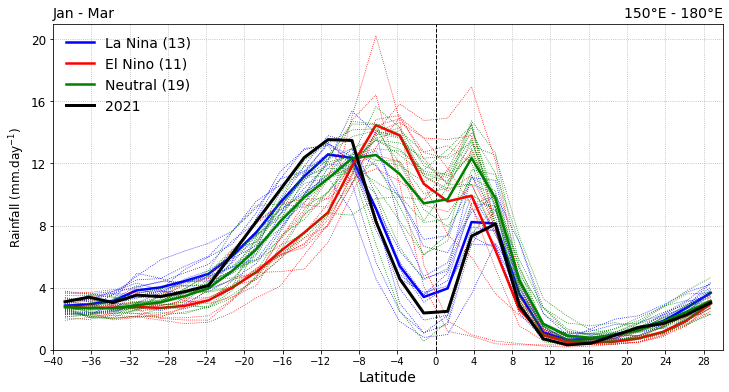

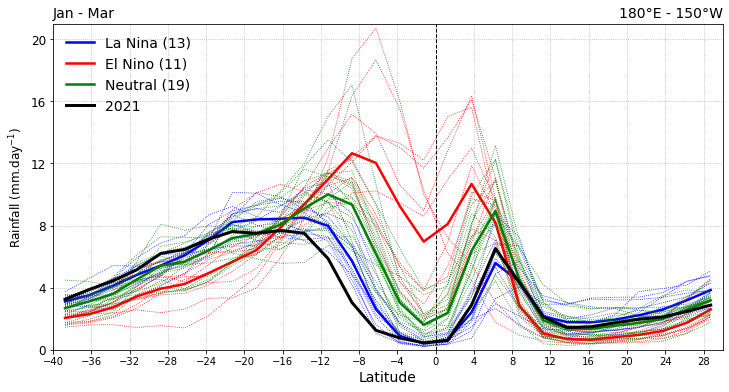

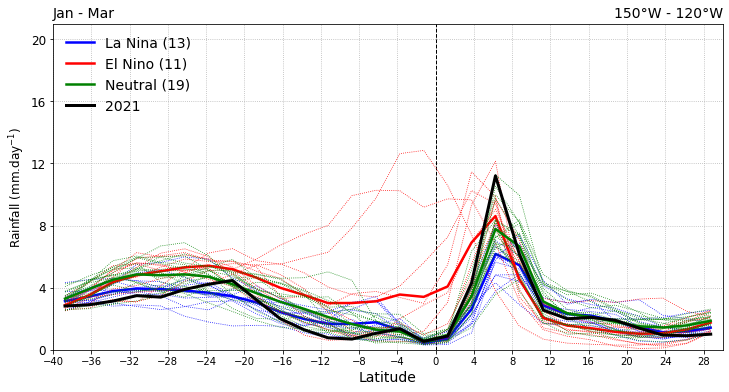

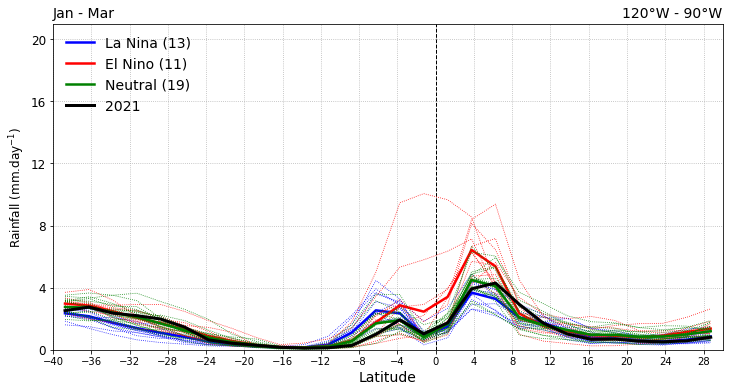

In [90]:
for i in range(4): 
    
#     label_sector = f"{lon_sectors[i]}E - {lon_sectors[i+1]}E"
    label_sector = f"{lon_labels[i]} - {lon_labels[i+1]}" 
    
    print(label_sector)
    
    sector_seas_ninos = ninos_cmorph.sel(lon=slice(lon_sectors[i],lon_sectors[i+1])).mean('lon')
    sector_seas_ninas = ninas_cmorph.sel(lon=slice(lon_sectors[i],lon_sectors[i+1])).mean('lon')
    sector_seas_neutral = neutral_cmorph.sel(lon=slice(lon_sectors[i],lon_sectors[i+1])).mean('lon')
    
    
    last_year = dset_seas.sel(time=f"{year}-{months[1]}")

    last_year = last_year.sel(lon=slice(lon_sectors[i],lon_sectors[i+1])).mean('lon')

    sector_seas_ninos = sector_seas_ninos.to_dataframe().unstack()

    sector_seas_ninas = sector_seas_ninas.to_dataframe().unstack()

    sector_seas_neutral = sector_seas_neutral.to_dataframe().unstack()

    last_year = last_year.to_dataframe()

    last_year = last_year.loc[:,'precip']

    last_year.index = last_year.index.droplevel(1)

    f, ax = plt.subplots(figsize=(12,6))

    ax.axvline(0, lw=1, color='k', ls='--')

    sector_seas_ninas.plot(ax=ax, color='b', legend=None, ls=':', lw=0.8)
    LN, = ax.plot(sector_seas_ninas.index, sector_seas_ninas.mean(axis=1), color='b', lw=2.5)

    sector_seas_ninos.plot(ax=ax, color='r', legend=None, ls=':', lw=0.8)
    EN, = ax.plot(sector_seas_ninos.index, sector_seas_ninos.mean(axis=1), color='r', lw=2.5)

    sector_seas_neutral.plot(ax=ax, color='g', legend=None, ls=':', lw=0.8)
    N, = ax.plot(sector_seas_neutral.index, sector_seas_neutral.mean(axis=1), color='g', lw=2.5)

    LY, = ax.plot(last_year.index, last_year, color='k', lw=3)

    ax.legend([LN, EN, N, LY], [f'La Nina ({len(ninas)})', f'El Nino ({len(ninos)})', f'Neutral ({len(neutral)})', str(year)], fontsize=14, loc=2, frameon=False )

    ax.set_xticks(np.arange(-40, 30 + 4, 4))
#     ax.set_xticklabels([u'40\u00B0S',u'30\u00B0S',u'20\u00B0S',u'10\u00B0S','Equ.',u'10\u00B0N',u'20\u00B0N',u'30\u00B0N'], fontsize=12); 
    ax.set_xlabel('Latitude', fontsize=14)

    ax.set_yticks(np.arange(0, 22, 4)); 
    ax.set_yticklabels(np.arange(0, 22, 4), fontsize=12); 
    ax.set_ylabel("Rainfall (mm.day$^{-1}$)", fontsize=12); 
    
    ax.set_xlim(-40, 30)

    ax.set_ylim(0, 21)

    ax.grid(ls=':')

    ax.set_title(title, loc='left', fontsize=14)

    ax.set_title(label_sector, loc='right', fontsize=14)

    f.savefig(f'../figures/comparison_last_year_ENSOs_{season}_{label_sector.replace(" ","")}_CMAP.png', dpi=400, facecolor='w')
    f.savefig(f'../figures/comparison_last_year_ENSOs_{season}_{label_sector.replace(" ","")}_CMAP.pdf', facecolor='w')